In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy.stats import expon
import sklearn
from sklearn.linear_model import LinearRegression
import math

In [13]:
pulls_wrk = pd.read_csv('./data/Working/pulls.csv')
pulls_wrk.head()

,id,time,name,pity,type,grouped,wishId,bannerId,guaranteed,rarity
0,160226106,2021-12-07 20:31:57+00,sucrose,5,character,t,33126977,100001,f,4
1,160253216,2021-11-02 22:22:11+00,diona,8,character,f,33130214,300021,f,4
2,160253217,2021-11-02 22:22:15+00,thoma,9,character,f,33130214,300021,t,4
3,160253218,2021-11-02 22:22:18+00,thoma,10,character,f,33130214,300021,f,4
4,160253219,2021-11-02 22:30:23+00,diona,10,character,f,33130214,300021,t,4


In [15]:
pulls_raw = pd.read_csv('./data/Raw/pulls.csv')
pulls_raw.head()

,id,time,name,pity,type,grouped,wishId,bannerId,guaranteed,rarity
0,160226106,2021-12-07 20:31:57+00,sucrose,5,character,t,33126977,100001,f,4
1,160253216,2021-11-02 22:22:11+00,diona,8,character,f,33130214,300021,f,4
2,160253217,2021-11-02 22:22:15+00,thoma,9,character,f,33130214,300021,t,4
3,160253218,2021-11-02 22:22:18+00,thoma,10,character,f,33130214,300021,f,4
4,160253219,2021-11-02 22:30:23+00,diona,10,character,f,33130214,300021,t,4


In [16]:
wish_total_raw = pd.read_csv('./data/Raw/wish_total.csv')
wish_total_raw.head()

,uniqueId,total,bannerType,legendary,rare,legendaryPercentage,rarePercentage
0,5524c5c4,20,beginners,0,3,0.000000,0.150000
1,5524c5c4,10,standard,0,1,0.000000,0.100000
2,6d523ee9,20,beginners,0,3,0.000000,0.150000
3,6d523ee9,189,character-event,2,23,0.010582,0.121693
4,6681f038,45,standard,2,6,0.044444,0.133333


In [19]:
wish_total_wrk = pd.read_csv('./data/Working/wish_total.csv')
wish_total_wrk.head()

,uniqueId,total,bannerType,legendary,rare,legendaryPercentage,rarePercentage
0,5524c5c4,20,beginners,0,3,0.000000,0.150000
1,5524c5c4,10,standard,0,1,0.000000,0.100000
2,6d523ee9,20,beginners,0,3,0.000000,0.150000
3,6d523ee9,189,character-event,2,23,0.010582,0.121693
4,6681f038,45,standard,2,6,0.044444,0.133333


In [2]:
wishes = pd.read_csv('./data/Working/wishes_clean.csv')
wishes_raw.head()

,id,uniqueId,rarePity,total,rare,legendary,bannerId,pityCount
0,32997229,563a48f1,{0;1;1;1;0;0;0;1;3;3;0},80,10,1,300022,{2;2;2;2;2;2;2;2;2;2;2;2;2;2;2;2;2;2;2;2;2;2;2...
1,32974023,c9c7af65,{0;0;0;1;1;0;0;0;1;5;0},65,8,1,300021,{1;1;1;1;1;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0...
2,32974028,fd132d49,{1;0;1;0;2;0;0;0;2;4;0},70,10,1,300021,{1;0;0;0;0;0;0;0;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1...
3,32974043,d220cb68,{0;0;0;0;0;0;0;0;2;0;0},18,2,0,300021,{0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0...
4,32974056,201802aa,{0;1;2;0;1;2;1;1;8;8;0},193,24,2,200001,{3;3;3;3;3;3;3;3;3;3;3;3;3;3;3;3;3;3;3;3;3;3;3...


In [3]:
def clean_info(test):
    test = test.replace('{', '[')
    test = test.replace('}', ']')
    test = test.replace(';', ',')
    return test

wishes_raw = pd.read_csv('./data/Raw/wishes_clean.csv')
wishes_raw['rarePity'] = wishes_raw['rarePity'].apply(clean_info)
wishes_raw['pityCount'] = wishes_raw['pityCount'].apply(clean_info)
wishes_raw['rarePity'] = wishes_raw['rarePity'].apply(eval)
wishes_raw['pityCount'] = wishes_raw['pityCount'].apply(eval)
wishes_raw.head()

,id,uniqueId,rarePity,total,rare,legendary,bannerId,pityCount
0,32997229,563a48f1,"[0, 1, 1, 1, 0, 0, 0, 1, 3, 3, 0]",80,10,1,300022,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ..."
1,32974023,c9c7af65,"[0, 0, 0, 1, 1, 0, 0, 0, 1, 5, 0]",65,8,1,300021,"[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,32974028,fd132d49,"[1, 0, 1, 0, 2, 0, 0, 0, 2, 4, 0]",70,10,1,300021,"[1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, ..."
3,32974043,d220cb68,"[0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0]",18,2,0,300021,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,32974056,201802aa,"[0, 1, 2, 0, 1, 2, 1, 1, 8, 8, 0]",193,24,2,200001,"[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ..."


In [4]:
wishes_raw.head(10)

,id,uniqueId,rarePity,total,rare,legendary,bannerId,pityCount
0,32997229,563a48f1,"[0, 1, 1, 1, 0, 0, 0, 1, 3, 3, 0]",80,10,1,300022,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ..."
1,32974023,c9c7af65,"[0, 0, 0, 1, 1, 0, 0, 0, 1, 5, 0]",65,8,1,300021,"[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,32974028,fd132d49,"[1, 0, 1, 0, 2, 0, 0, 0, 2, 4, 0]",70,10,1,300021,"[1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, ..."
3,32974043,d220cb68,"[0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0]",18,2,0,300021,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,32974056,201802aa,"[0, 1, 2, 0, 1, 2, 1, 1, 8, 8, 0]",193,24,2,200001,"[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ..."
5,32974068,e073dfd9,"[1, 0, 0, 1, 0, 1, 0, 0, 5, 3, 0]",83,11,1,300022,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
6,32974077,6bfad6c1,"[0, 1, 1, 1, 2, 1, 1, 8, 3, 0, 0]",122,18,2,400020,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, ..."
7,32974086,08a2f5e6,"[0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 0]",45,5,0,300020,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
8,32974088,69ed5b74,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",1,0,0,400021,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
9,32974093,245cd43d,"[0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0]",20,3,0,300022,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


0.9783491538198565
[0.13060113]
0.07223805960547391


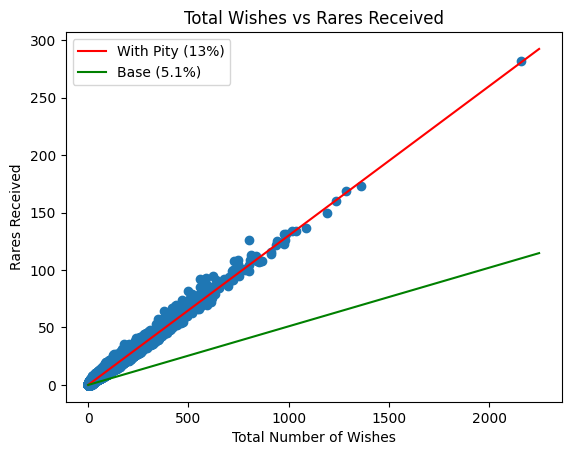

In [7]:
X = wishes_raw['total'].to_numpy().reshape(-1, 1)
Y = wishes_raw['rare'].to_numpy()

plt.scatter(x=X, y=Y)

# Expected
X1 = np.arange(0, 2250, step=0.1)
Y1 = X1 * 0.13
plt.plot(X1, Y1, color='r', label='With Pity (13%)')

# Base
X2 = np.arange(0, 2250, step=0.1)
Y2 = X2 * 0.051
plt.plot(X2, Y2, color='g', label='Base (5.1%)')

# Regression
reg = LinearRegression().fit(X, Y)
print(reg.score(X, Y))
print(reg.coef_)
print(reg.intercept_)

plt.title('Total Wishes vs Rares Received')
plt.xlabel('Total Number of Wishes')
plt.ylabel('Rares Received')
plt.legend(loc='upper left')
plt.show()

0.717749311250271
[0.01529918]
-0.007377696177140236


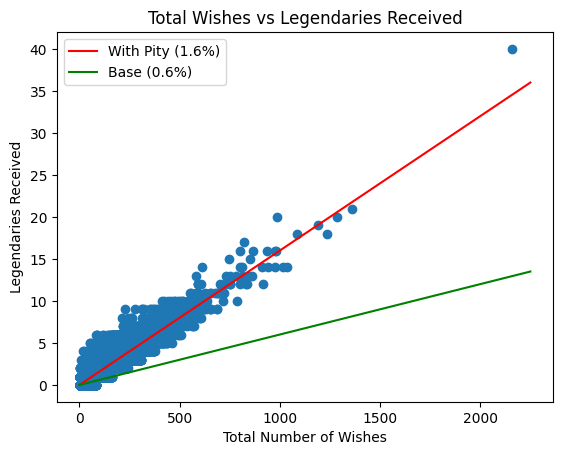

In [8]:
X = wishes_raw['total'].to_numpy().reshape(-1, 1)
Y = wishes_raw['legendary'].to_numpy()

plt.scatter(x=X, y=Y)

X1 = np.arange(0, 2250, step=0.1)
Y1 = X1 * 0.016
plt.plot(X1, Y1, color='r', label='With Pity (1.6%)')

X2 = np.arange(0, 2250, step=0.1)
Y2 = X2 * 0.006
plt.plot(X2, Y2, color='g', label='Base (0.6%)')

reg = LinearRegression().fit(X, Y)
print(reg.score(X, Y))
print(reg.coef_)
print(reg.intercept_)

plt.title('Total Wishes vs Legendaries Received')
plt.xlabel('Total Number of Wishes')
plt.ylabel('Legendaries Received')
plt.legend(loc='upper left')
plt.show()

In [51]:
# Understanding pity!
# Pity increases after arbitrary number of pulls
# Pity decreases by 1 after pulling a legendary
wishes_raw['pityCount'].head()

0    [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...
1    [1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2    [1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, ...
3    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
4    [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...
Name: pityCount, dtype: object

In [57]:
# for given pity, how many pulls needed for legendary?
# for how long does it take for pity to increase?

pity_increase = dict() # from n to n + 1
pity_legendary_pull = dict()

for j, l in enumerate(wishes_raw['pityCount']):
    if j == 0:
        continue
    
    cur_pity = l[0]
    prev_change = 0
    for i, val in enumerate(l):
        if val > cur_pity:
            if cur_pity not in pity_increase:
                pity_increase[cur_pity] = []
            pity_increase[cur_pity].append(i - prev_change)
            prev_change = i
            cur_pity = val
        
        if val < cur_pity:
            if cur_pity not in pity_legendary_pull:
                pity_legendary_pull[cur_pity] = []
            pity_legendary_pull[cur_pity].append(i - prev_change)
            
            if cur_pity - val > 1:
                if 0 not in pity_legendary_pull:
                    pity_legendary_pull[0] = []
                pity_legendary_pull[0].append(cur_pity - val - 1)
            prev_change = i
            cur_pity = val



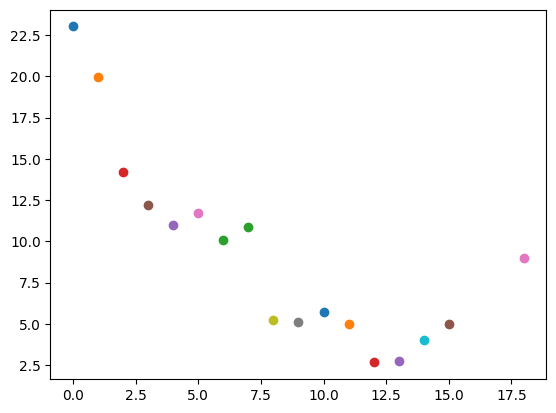

In [119]:
for key, l in pity_increase.items():
    data = np.array(l)
    plt.scatter(key, data.mean())
plt.show()

0.04344692977575286


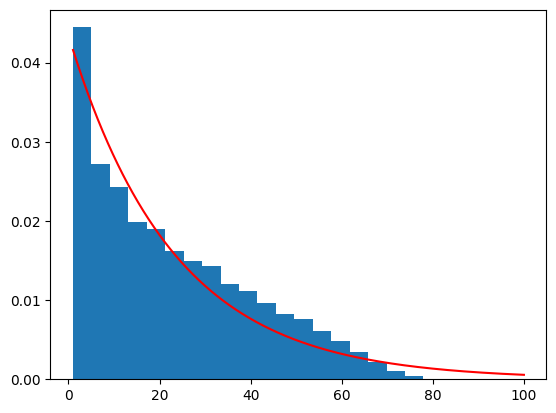

In [212]:
data = np.array(pity_increase[0])

plt.hist(data, 20, density=True)

# exponential distribution
lmb = 1 / data.mean()
print(lmb)

X = np.linspace(1, 100, 1000)
Y = lmb * np.exp(-X * lmb)
plt.plot(X, Y, color='r')
plt.show()

In [213]:
print(len(pity_increase))

17


In [214]:
for i in range(len(pity_increase)):
    inc_rate_at_n = np.array(pity_increase[i])
    plt.figure(i)

    plt.hist(inc_rate_at_n, density=True)
    plt.title(f'Distribution of Pulls to increase Pity at Pity Level {i}')
    plt.xlabel('Number of pulls')
    plt.ylabel('Normalized Frequency of Pulls')

    lmb = 1 / inc_rate_at_n.mean()

    X = np.linspace(1, 100, 1000)
    Y = lmb * np.exp(-X * lmb)
    plt.plot(X, Y, color='r', label=f'λ={round(lmb, 3)}')
    plt.legend(loc='upper right')

    plt.savefig(f'./pity_inc_img/pity_inc_{i}.png', dpi=500)
    plt.close(i)


# this data suggests that PITY correlates with the parameter of a specific exponential distribution

KeyError: 16

In [194]:
for i in range(len(pity_legendary_pull)):
    if i == 29:
        break
    pull_rate_at_n = np.array(pity_legendary_pull[i])
    plt.figure(i)

    plt.hist(pull_rate_at_n, density=True)
    plt.title(f'Distribution of Pulls Needed for Legendary at Pity Level {i}')
    plt.xlabel('Number of pulls')
    plt.ylabel('Normalized Frequency of Pulls')

    lmb = 1 / pull_rate_at_n.mean()

    X = np.linspace(1, 100, 1000)
    Y = lmb * np.exp(-X * lmb)
    plt.plot(X, Y, color='r', label=f'λ={round(lmb, 3)}')
    plt.legend(loc='upper right')

    plt.savefig(f'./pull_rate_img/pull_rate_at_{i}.png', dpi=500)
    plt.close(i)


# this data suggests that PITY correlates with the parameter of a specific exponential distribution

/tmp/ipykernel_1515/3201057574.py:1: RuntimeWarning: divide by zero encountered in double_scalars
  lambdas = np.array([1 / np.array(x).mean() for x in pity_legendary_pull])


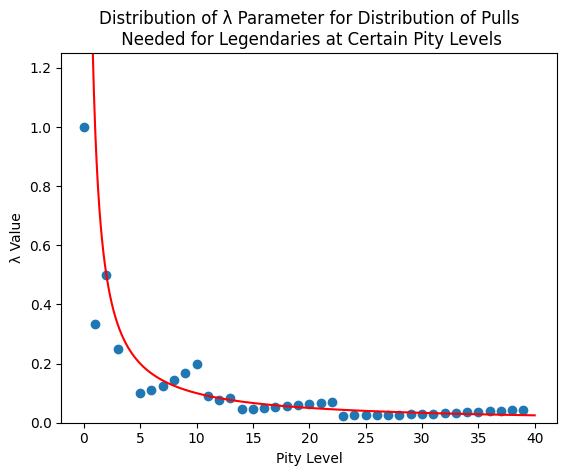

In [216]:
lambdas = np.array([1 / np.array(x).mean() for x in pity_legendary_pull])
x = np.linspace(0.1, 40, 1000)
y = 1 / x

# inverse function

plt.title('Distribution of λ Parameter for Distribution of Pulls\n Needed for Legendaries at Certain Pity Levels')
plt.xlabel('Pity Level')
plt.ylabel('λ Value')
plt.plot(x, y, color='r')
plt.ylim(0, 1.25)
plt.scatter(range(len(lambdas)), lambdas)
plt.show()

In [205]:
m = 0

for l in wishes_raw['pityCount']:
    m = max(m, max(l))

print(m)

41


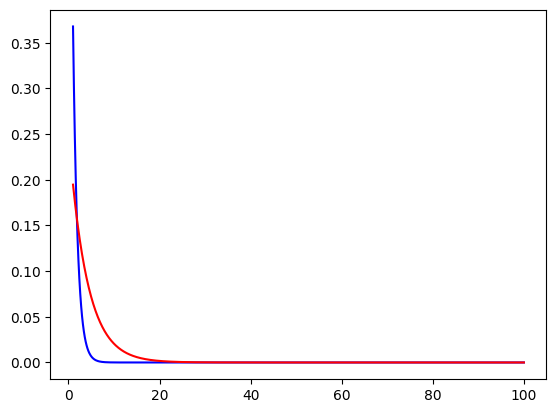

In [210]:
lmb1 = 1
X1 = np.linspace(1, 100, 1000)
Y1 = lmb1 * np.exp(-X1 * lmb1)
plt.plot(X1, Y1, color='b')

lmb2 = 0.25
X2 = np.linspace(1, 100, 1000)
Y2 = lmb2 * np.exp(-X2 * lmb2)
plt.plot(X2, Y2, color='r')
plt.show()